In [33]:
import tensorflow as tf

In [34]:
import os 
import zipfile

local_zip = 'C:/Users/LALITH/Downloads/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('C:/Users/LALITH/Downloads/horse-or-human')
local_zip = 'C:/Users/LALITH/Downloads/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('C:/Users/LALITH/Downloads/validation-horse-or-human')
zip_ref.close()

In [35]:
train_horse_dir = os.path.join('C:/Users/LALITH/Downloads/horse-or-human/horses')

train_human_dir = os.path.join('C:/Users/LALITH/Downloads/horse-or-human/horses')

validation_horse_dir = os.path.join('C:/Users/LALITH/Downloads/validation-horse-or-human/horses')

validation_human_dir = os.path.join('C:/Users/LALITH/Downloads/validation-horse-or-human/humans')

In [36]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [37]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 500
total validation horse images: 128
total validation human images: 128


In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

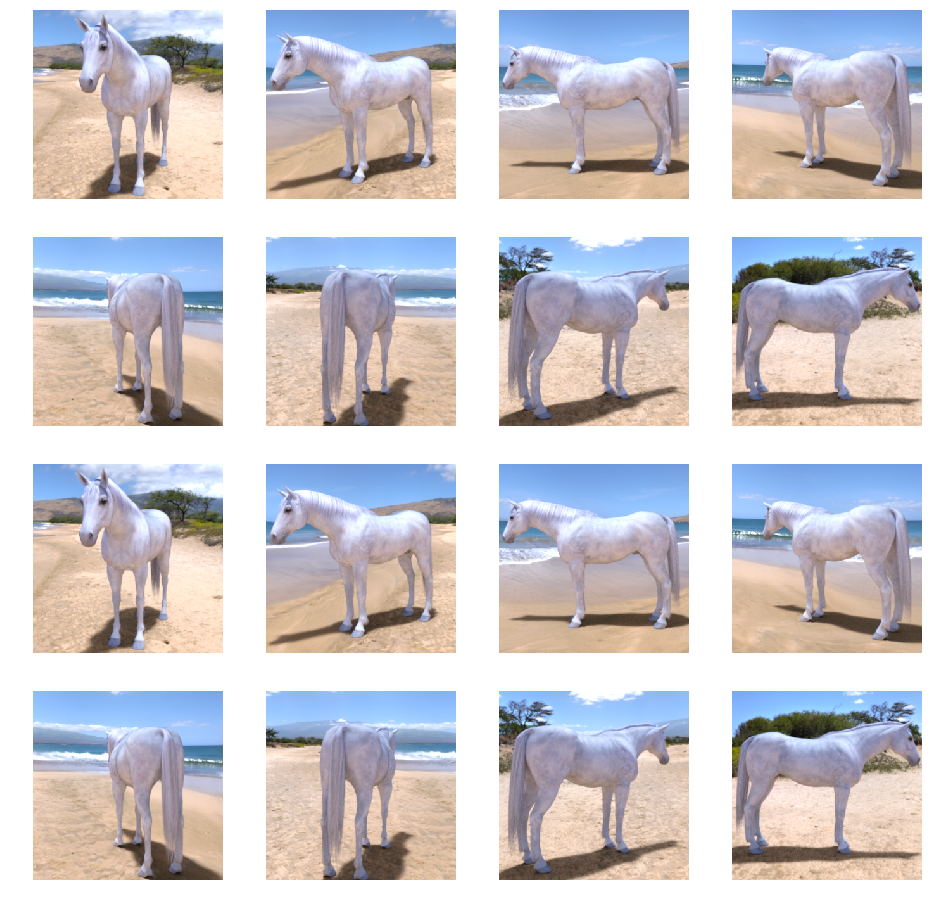

In [39]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [40]:
model = tf.keras.Sequential([
     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
     ])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [42]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.01),
             metrics=['acc'])

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/LALITH/Downloads/horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/LALITH/Downloads/validation-horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

In [21]:
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [29]:
path = 'C:/Users/LALITH/Downloads/horse.jpg'

In [30]:
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [31]:
images = np.vstack([x])

In [32]:
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("human")
else:
    print("horse")

[0.]
horse
